In [130]:
library(data.table)
library(ggplot2)
library(RColorBrewer)

main_dir = "/home/n10853499/01-projects/00-allison_microscope/" # change this to the folder where your transect data is stored
# get cell relative abundances by transect
transect_labels <- fread(paste0(main_dir, "/00-jupyter/10-allison_umap/transect_labels_clustered.tsv"))
transect_labels[, index:=NULL]
transect_labels$transect_label <- factor(transect_labels$transect_label)
# transect_labels

In [159]:
# Large species cluster relative abundances

cell_counts <- transect_labels[, c("Truth", "transect_label")]
cell_counts <- cell_counts[, .N, by=c("Truth", "transect_label")]
# print(cell_counts)
cell_counts[, total_cells:=sum(N), by=.(transect_label)]
# print(cell_counts)
cell_counts[, relative_abundance:=N/total_cells]
cell_counts

Truth,transect_label,N,total_cells,relative_abundance
<chr>,<fct>,<int>,<int>,<dbl>
Pico,1,487,13538,0.035972817
Pro,1,10197,13538,0.753213178
Debris,1,1367,13538,0.100975033
Syn,1,1487,13538,0.109838972
Pro,3,16813,17961,0.936083737
Debris,3,392,17961,0.021825065
Syn,3,368,17961,0.020488837
Pico,3,388,17961,0.021602361
Pro,5,17053,18228,0.935538732


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


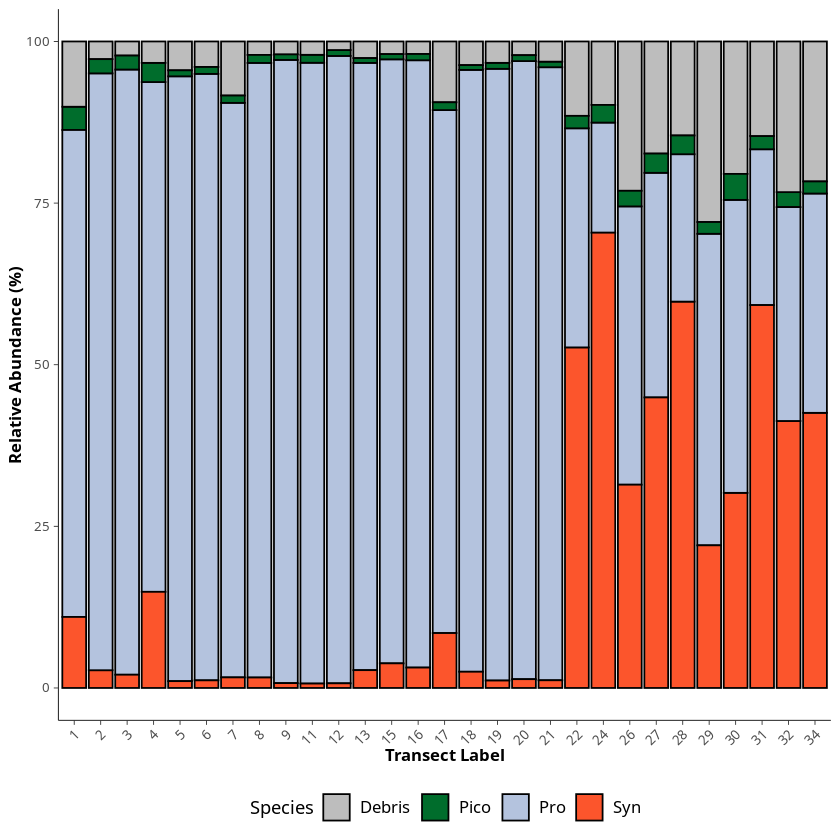

In [162]:
# Plots species abundances

mypal <- colorRampPalette(brewer.pal(6, "PuBu"))
mypal2 <- colorRampPalette(brewer.pal(9, "YlOrRd"))
mypal3 <- colorRampPalette(brewer.pal(6, "Greys"))
mypal4 <- colorRampPalette(brewer.pal(6, "Greens"))


ggplot(cell_counts) +
    geom_histogram(aes(x=transect_label, y=relative_abundance*100, fill=Truth), color="black", stat='identity') +
    labs(y='Relative Abundance (%)', x='Transect Label', fill="Species") +
    # facet_wrap(~Truth) +
    scale_fill_manual(values=c(mypal3(6)[3], mypal4(3)[3], mypal(4)[2], mypal2(19)[12])) +
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.y=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
          axis.title.x=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          strip.text.y=element_text(size=6),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom",
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())

In [161]:
# relative abundances with species clusters

cell_counts_c <- transect_labels[, c("Truth", "transect_label", "cluster")]
cell_counts_c <- cell_counts_c[, .N, by=c("Truth", "transect_label", "cluster")]
# print(cell_counts)
cell_counts_c[, total_cells:=sum(N), by=.(transect_label)]
# print(cell_counts)
cell_counts_c[, relative_abundance:=N/total_cells]
cell_counts_c


Truth,transect_label,cluster,N,total_cells,relative_abundance
<chr>,<fct>,<chr>,<int>,<int>,<dbl>
Pico,1,pico_1,399,13538,2.947260e-02
Pro,1,pro_1,4021,13538,2.970158e-01
Pro,1,pro_2,4636,13538,3.424435e-01
Debris,1,debris_0,1330,13538,9.824199e-02
Syn,1,syn_0,1252,13538,9.248043e-02
Syn,1,syn_2,37,13538,2.733048e-03
Debris,1,debris_-1,22,13538,1.625055e-03
Pro,1,pro_0,1323,13538,9.772492e-02
Pico,1,pico_0,85,13538,6.278623e-03


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


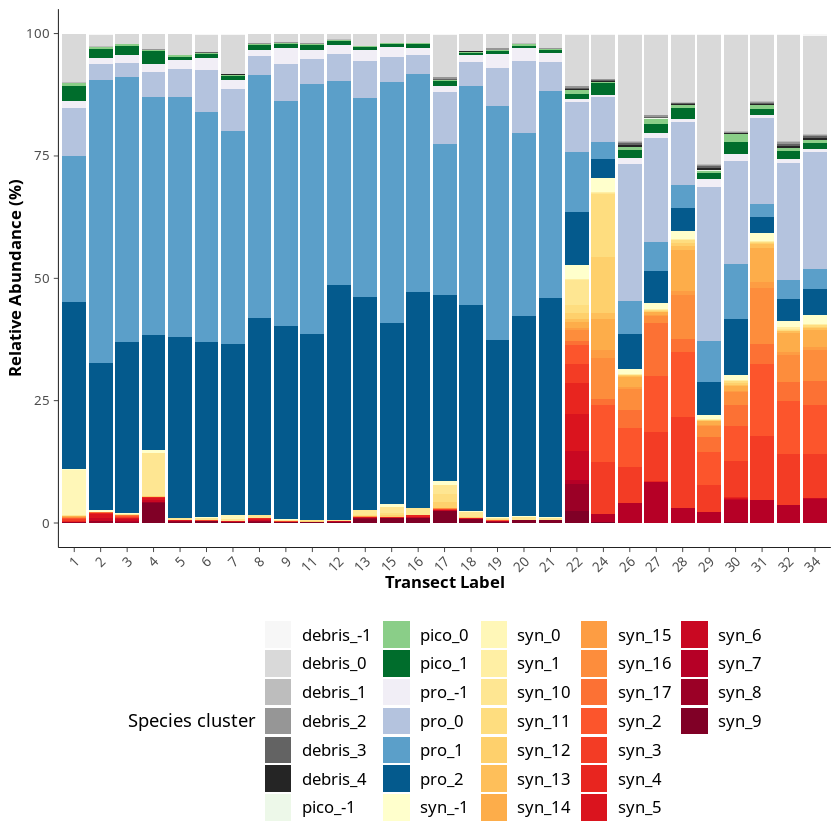

In [163]:
# Plot within species abundances

mypal <- colorRampPalette(brewer.pal(6, "PuBu"))
mypal2 <- colorRampPalette(brewer.pal(9, "YlOrRd"))
mypal3 <- colorRampPalette(brewer.pal(6, "Greys"))
mypal4 <- colorRampPalette(brewer.pal(6, "Greens"))

ggplot(cell_counts_c) +
    geom_histogram(aes(x=transect_label, y=relative_abundance*100, fill=cluster), stat='identity') +
    labs(y='Relative Abundance (%)', x='Transect Label', fill="Species cluster") +
    # facet_wrap(~Truth) +
    scale_fill_manual(values=c(mypal3(6), mypal4(3), mypal(4), mypal2(19))) +
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.y=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
          axis.title.x=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          strip.text.y=element_text(size=6),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom",
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank())